<a href="https://colab.research.google.com/github/madhurachougule/Assignments/blob/main/Empty_Employee_DB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SF Salaries Exercise



# **Load Necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ** Read Salaries.csv as a dataframe called sal.**

In [ ]:
import pandas as pd
path ="/content/Salaries.csv"
sal = pd.read_csv(path)
sal.head()

# ** Check the head of the DataFrame. **

In [148]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [149]:
# Check nan values
sal.isna().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,609
OvertimePay,4
OtherPay,4
Benefits,36163
TotalPay,0
TotalPayBenefits,0
Year,0


In [150]:
#total reords , rows and columns
sal.shape

(148654, 13)

In [151]:
#check feature names
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [164]:
#drop Notes and Status columns
sal = sal.drop(columns=['Notes','Status'],errors='ignore')
sal[:2]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco


In [ ]:
#check new shape
sal.shape

(148654, 11)

In [ ]:
#check columns
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [ ]:
#fill BasePay NaN by using some technique
sal.BasePay

,BasePay
0,167411.18
1,155966.02
2,212739.13
3,77916.00
4,134401.60
...,...
148649,0.00
148650,NaN
148651,NaN
148652,NaN


# **What is the average BasePay ?**

In [165]:
sal.BasePay.mean()

np.float64(66325.4488404877)

In [166]:
sal[:1]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


# ** What is the highest amount of OvertimePay in the dataset ? **

In [169]:
sal.OvertimePay.max()

245131.88

## Fetch record of Highest paid employee

In [121]:
sal = sal.rename(columns={"Experience Years": "TotalPay", "Salary": "Benefits"})
sal[sal['TotalPay']==sal['TotalPay'].max()]

,TotalPay,Benefits
39,10.5,121872


## Fetch name of highest Overtime pay employee


In [ ]:
sal[sal['OvertimePay']==sal['OvertimePay'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco


# ** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [ ]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle'].values[0]

'CAPTAIN, FIRE SUPPRESSION'

# ** How much does JOSEPH DRISCOLL make (including benefits)? **

In [ ]:
joseplh_sal=sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['Benefits']
print(f"JOSEPH DRISCOLL make (including benefits):{joseplh_sal.values[0]}")

JOSEPH DRISCOLL make (including benefits):nan


# ** What is the name, Job title of highest paid person (including benefits)?**

In [ ]:

sal.loc[sal['Benefits'].idxmax()]

,110533
Id,110534
EmployeeName,William J Coaker Jr.
JobTitle,Chief Investment Officer
BasePay,257340.0
OvertimePay,0.0
OtherPay,82313.7
Benefits,96570.66
TotalPay,339653.7
TotalPayBenefits,436224.36
Year,2014


In [ ]:

sal.loc[sal['Benefits'].idxmax()]

,110533
Id,110534
EmployeeName,William J Coaker Jr.
JobTitle,Chief Investment Officer
BasePay,257340.0
OvertimePay,0.0
OtherPay,82313.7
Benefits,96570.66
TotalPay,339653.7
TotalPayBenefits,436224.36
Year,2014


# ** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [ ]:
sal.loc[sal["Benefits"].idxmin()]

,110530
Id,110531
EmployeeName,David P Kucia
JobTitle,Police Officer 3
BasePay,NaN
OvertimePay,0.0
OtherPay,0.0
Benefits,-33.89
TotalPay,0.0
TotalPayBenefits,-33.89
Year,2013


## Show me the records with totalpaybenefit less than or equal to 0


In [ ]:
sal[sal['TotalPayBenefits']<=0].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.0,0.00,2011,San Francisco
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.0,0.00,2011,San Francisco
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.0,NaN,0.0,0.00,2011,San Francisco
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.0,-2.73,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.20,0.0,-8.20,2013,San Francisco


# ** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [175]:
# Yearwise Average BasePay
# Check if 'Year' column exists in the DataFrame
if 'Year' not in sal.columns:
    print("Error: 'Year' column not found in the DataFrame. Please check your data source.")
else:
    # Yearwise Average BasePay
    yearwise = sal.groupby("Year")["BasePay"].mean()
    print(yearwise.loc[2011:2014])

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64


In [173]:
sal.query('EmployeeName == "JOSEPH DRISCOLL"')['TotalPayBenefits']

,TotalPayBenefits
24,270324.91


# ** How many unique job titles are there? **

In [ ]:
sal['JobTitle'].unique().size

2159

# ** What are the top 5 most common jobs? **

In [ ]:
sal['JobTitle'].value_counts().head()

,count
JobTitle,
Transit Operator,7036
Special Nurse,4389
Registered Nurse,3736
Public Svc Aide-Public Works,2518
Police Officer 3,2421


In [174]:
sal['JobTitle'].value_counts().tail()

,count
JobTitle,
Light Rail Vehicle Equip Eng,1
Civil Case Settlmnt Specialist,1
"ADMINISTRATOR, SFGH MEDICAL CENTER",1
CHIEF OF POLICE,1
Special Assistant 8,1


# How many are there those work as a POLICE OFFICER III

In [ ]:
sal[sal['JobTitle']=='Police Officer 3'].shape[0]

2421

# In which department we have least employees?

In [ ]:
sal['JobTitle'].min()

'ACCOUNT CLERK'

# Fetch record of year 2011 where Basepay 200000

In [ ]:
sal[(sal["Year"] == 2011) & (sal["BasePay"] == 200000)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


# How much average basepay is given to employees inthe year 2013

In [ ]:
sal[sal['Year']==2013]['BasePay'].mean()

np.float64(69630.03021648065)

# Plot.the % distribustion of Yearwise TotalPay

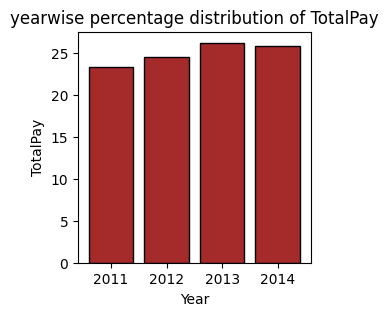

In [ ]:
yearwise=sal.groupby('Year')['TotalPay'].sum()
#yearwise
yearwise_per=(yearwise/yearwise.sum())*100
#yearwise_per
plt.figure(figsize=(3,3))
plt.bar(yearwise_per.index,yearwise_per,color='brown',edgecolor='black')
plt.xlabel('Year')
plt.ylabel('TotalPay')
plt.title('yearwise percentage distribution of TotalPay')

plt.show()

# How many employees getting 0 overtimePay?

In [ ]:
sal[sal['OvertimePay']==0].shape[0]

77321

## Load data from Github

In [120]:
url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Salary%20Data.csv"
sal = pd.read_csv(url)
sal.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
